<a href="https://colab.research.google.com/github/DavidGerardo2/Actividades/blob/main/AF6_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# AF6: Aprendizaje Supervisado. Árbol de decisión
# Datos del equipo:
# - David Gerardo Guipzot Sanchez - 2173741 - Martes N4,N5,N6
# - Nallely Sarahi Villarreal Torres - 2025683 - Martes N4,N5,N6
# - Diego Armando Bustos Montantes - 2063883 - Martes N4,N5,N6
# Fecha: 07 de octubre del 2025

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
cancer_data = load_breast_cancer()

# Para facilitar la manipulación, convertimos los datos en un DataFrame de Pandas.
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.Series(cancer_data.target)

# Mostramos las primeras filas de los datos y la distribución de las etiquetas.
print("Primeras 5 filas de características (X):")
print(X.head())
print("\nEtiquetas (y): 0 = Maligno, 1 = Benigno")
print(y.value_counts())

Primeras 5 filas de características (X):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # 20% de los datos para el conjunto de prueba
    random_state=42   # Semilla para la reproducibilidad
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 455 muestras
Tamaño del conjunto de prueba: 114 muestras


In [19]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

print("Modelo de Árbol de Decisión entrenado exitosamente.")

Modelo de Árbol de Decisión entrenado exitosamente.


Precisión (Accuracy) del modelo: 0.9474
--------------------------------------------------
Reporte de Clasificación:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

--------------------------------------------------


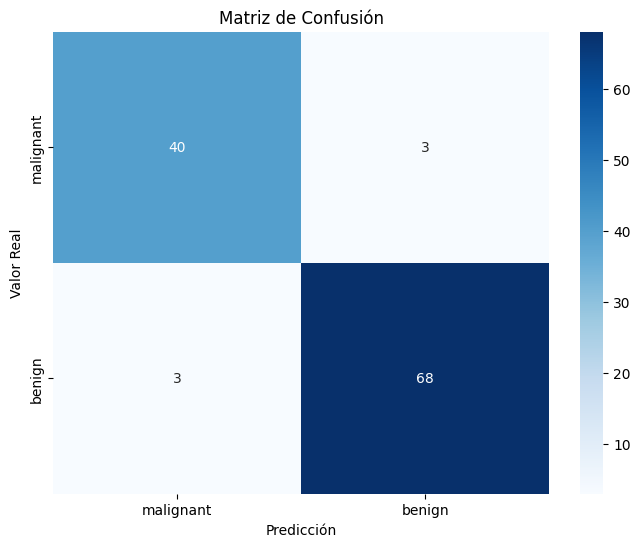

In [20]:
y_pred = decision_tree_model.predict(X_test)

# 1. Calculamos la precisión (accuracy) del modelo.
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy) del modelo: {accuracy:.4f}")
print("-" * 50)

# 2. Generamos y mostramos el reporte de clasificación.
# Este reporte incluye precisión, recall, f1-score y soporte para cada clase.
class_report = classification_report(y_test, y_pred, target_names=cancer_data.target_names)
print("Reporte de Clasificación:")
print(class_report)
print("-" * 50)

# 3. Obtenemos y visualizamos la matriz de confusión.
# La matriz de confusión nos muestra los aciertos y errores del modelo.
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=cancer_data.target_names,
            yticklabels=cancer_data.target_names)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Generando la representación gráfica del Árbol de Decisión...


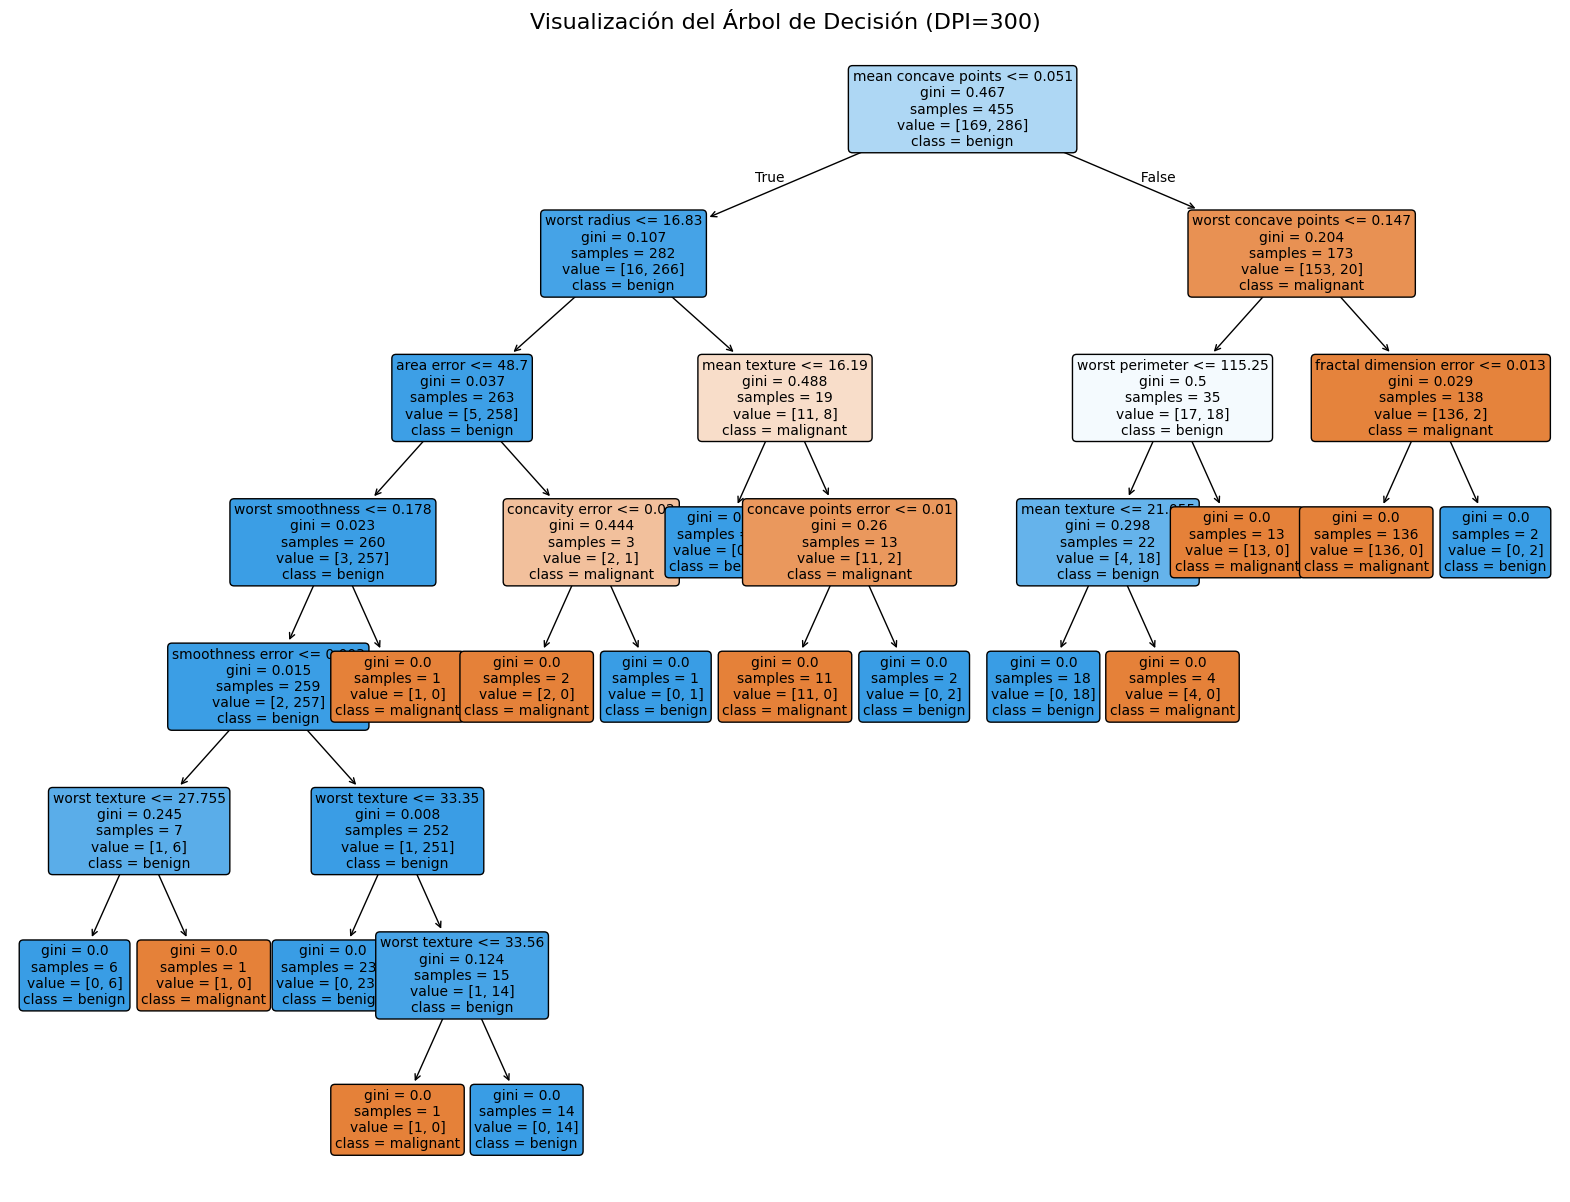


Visualización guardada como 'decision_tree_visualization.png'.


In [21]:
print("Generando la representación gráfica del Árbol de Decisión...")

plt.figure(figsize=(20, 15))
plot_tree(decision_tree_model,
          filled=True,
          feature_names=cancer_data.feature_names,
          class_names=cancer_data.target_names,
          rounded=True,
          fontsize=10)

# Guardamos la imagen con la resolución especificada.
plt.savefig('decision_tree_visualization.png', dpi=300)
plt.title("Visualización del Árbol de Decisión (DPI=300)", fontsize=16)
plt.show()

print("\nVisualización guardada como 'decision_tree_visualization.png'.")